In [64]:
conda install mpld3



SyntaxError: invalid syntax (3002453968.py, line 1)

In [65]:
conda install dtale

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/anaconda3/envs/tutorialenv

  added / updated specs:
    - dtale


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-python-1.0.9        |   py39h9fcab8e_6         372 KB  conda-forge
    dash-2.4.1                 |     pyhd8ed1ab_0         7.6 MB  conda-forge
    dash-bootstrap-components-1.1.0|     pyhd8ed1ab_0         107 KB  conda-forge
    dash-core-components-2.0.0 |     pyhd8ed1ab_1           7 KB  conda-forge
    dash-daq-0.5.0             |     pyh9f0ad1d_1         545 KB  conda-forge
    dash-html-components-2.0.0 |     pyhd8ed1ab_1           8 KB  conda-forge
    dash_colorscales-0.0.4     |     pyh9f0ad1d_0          59 KB  cond

In [66]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()
import warnings
import dtale
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",2)


In [9]:
#DJIA
A = pd.read_csv("A.csv", parse_dates=True,index_col=0)
A

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000
...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,472700000


In [10]:
#SPY
B = pd.read_csv("B.csv", parse_dates=True,index_col=0)
B

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,2122.070068,2123.889893,2116.810059,2122.72998,2122.72998,3092080000
...,...,...,...,...,...,...
2020-05-14,2794.540039,2852.800049,2766.639893,2852.50000,2852.50000,5641920000


In [11]:
#VIX
C = pd.read_csv("C.csv", parse_dates=True,index_col=0)
C

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,12.46,13.090000,12.350000,12.380000,12.380000,0
...,...,...,...,...,...,...
2020-05-14,35.16,39.279999,32.330002,32.610001,32.610001,0


In [12]:
merged_df = A.join(B, how="outer", lsuffix="_A",sort=True).join(C, how="outer", lsuffix= "_B", rsuffix="_C", sort=True)
merged_df

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000.0,2122.070068,2123.889893,2116.810059,2122.72998,2122.72998,3.092080e+09,12.46,13.090000,12.350000,12.380000,12.380000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,472700000.0,2794.540039,2852.800049,2766.639893,2852.50000,2852.50000,5.641920e+09,35.16,39.279999,32.330002,32.610001,32.610001,0.0


In [13]:
#check if any rows have missing data in all fields
merged_df[merged_df.isnull().all(axis=1)]

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,


In [14]:
# rows with atleast 1 missing field
merged_df[["Close_A", "Close_B", "Close_C"]].isnull().any(axis=1).sum()

148

In [15]:
# drop empty closing prices
valid_close_df = merged_df.dropna(subset=["Close_A", "Close_B", "Close_C"], how="any")

In [16]:
valid_close_df[['Close_A', 'Close_B', 'Close_C']].isnull().any(axis=1).sum()

0

In [18]:
valid_close_df

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000.0,2122.070068,2123.889893,2116.810059,2122.72998,2122.72998,3.092080e+09,12.46,13.090000,12.350000,12.380000,12.380000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,472700000.0,2794.540039,2852.800049,2766.639893,2852.50000,2852.50000,5.641920e+09,35.16,39.279999,32.330002,32.610001,32.610001,0.0


In [19]:
valid_close_df.isnull().any(axis=1).sum()

165

In [20]:
valid_close_df[valid_close_df.isnull().any(axis=1)]

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,
2015-05-18,18267.250000,18325.539063,18244.259766,18298.880859,18298.880859,79080000.0,2121.300049,2131.780029,2120.010010,2129.199951,2129.199951,2.888190e+09,13.080000,13.22,NaN,12.730000,12.730000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-01,24120.779297,24120.779297,23645.300781,23723.689453,23723.689453,418160000.0,NaN,2869.090088,2821.610107,2830.709961,2830.709961,4.753160e+09,38.169998,39.57,36.59,37.189999,37.189999,0.0


In [21]:
#backfill empty values
valid_close_complete = valid_close_df.fillna(method="backfill")

In [23]:
valid_close_complete.isnull().any(axis=1).sum()

0

In [24]:
# C has issues as the low should never be higher than the high. Volume also 0.
pd.set_option("display.max_rows", None)
valid_close_complete.describe()

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.0
mean,22291.125036,22402.395046,22168.922744,22292.881128,22292.531416,2.614436e+08,2517.857235,2529.804546,2504.360406,2518.053995,2518.053995,3.746609e+09,14.628353,17.614230,16.655851,16.417606,16.417606,0.0
std,3771.056417,3784.558787,3755.740756,3769.395516,3767.906829,1.537677e+08,374.081451,375.376401,373.086693,374.314671,374.314671,9.013618e+08,29.023906,9.056045,20.123487,8.016538,8.016538,0.0
min,15676.259766,15897.820313,15370.330078,15660.179688,15660.179688,4.589000e+07,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.296540e+09,-400.000000,9.310000,8.560000,9.140000,9.140000,0.0
25%,18232.280274,18285.384766,18156.614258,18230.160156,18227.615235,1.233350e+08,2144.320069,2152.525024,2134.464966,2142.250000,2142.250000,3.247990e+09,12.405000,12.900000,11.875000,12.300000,12.300000,0.0
50%,22762.029297,22872.890625,22634.449219,22773.669922,22773.669922,2.631800e+08,2521.199951,2551.820068,2503.189941,2531.939941,2531.939941,3.560770e+09,14.190000,15.010000,13.470000,14.090000,14.090000,0.0
75%,25516.320312,25659.810547,25382.705078,25518.895508,25518.895508,3.328450e+08,2815.010010,2831.880004,2800.239991,2817.330078,2817.330078,3.967360e+09,17.685001,19.040001,16.809999,17.665000,17.665000,0.0
max,29440.470703,29568.570313,29406.750000,29551.419922,29551.419922,2.190810e+09,3380.449951,3393.520020,3378.830078,3386.149902,3386.149902,9.044690e+09,82.690002,85.470001,330.000000,82.690002,82.690002,0.0


In [30]:
pd.set_option("display.max_rows", 2)
prices_only = valid_close_complete.drop(["Volume_A", "Volume_B", "Volume_C"], axis=1)
prices_only

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Open_C,High_C,Low_C,Close_C,Adj Close_C
Date,,,,,,,,,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,2122.070068,2123.889893,2116.810059,2122.72998,2122.72998,12.46,13.090000,12.350000,12.380000,12.380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,2794.540039,2852.800049,2766.639893,2852.50000,2852.50000,35.16,39.279999,32.330002,32.610001,32.610001


<AxesSubplot:xlabel='Date'>

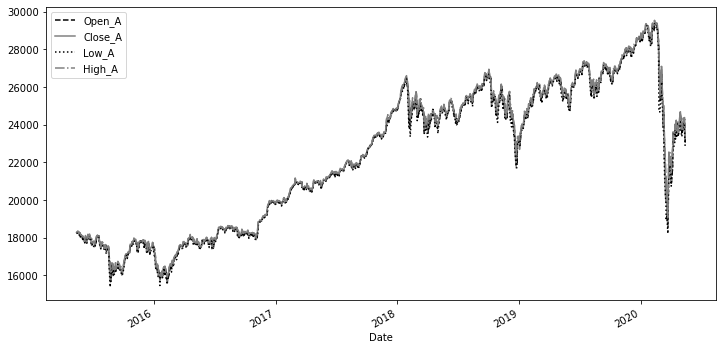

In [31]:
# plot prices of dataset A

valid_close_complete['Open_A'].plot(figsize=(12,6), linestyle='--', color='black', legend='Open_A')
valid_close_complete['Close_A'].plot(figsize=(12,6), linestyle='-', color='grey', legend='Close_A')
valid_close_complete['Low_A'].plot(figsize=(12,6), linestyle=':', color='black', legend='Low_A')
valid_close_complete['High_A'].plot(figsize=(12,6), linestyle='-.', color='grey', legend='High_A')


<AxesSubplot:xlabel='Date'>

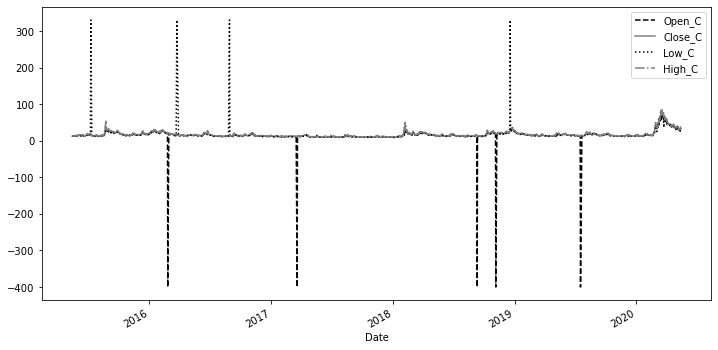

In [32]:
valid_close_complete['Open_C'].plot(figsize=(12,6), linestyle='--', color='black', legend='Open_C')
valid_close_complete['Close_C'].plot(figsize=(12,6), linestyle='-', color='grey', legend='Close_C')
valid_close_complete['Low_C'].plot(figsize=(12,6), linestyle=':', color='black', legend='Low_C')
valid_close_complete['High_C'].plot(figsize=(12,6), linestyle='-.', color='grey', legend='High_C')


In [35]:
#remove outlier prices using Z score/absolute value to clean up C
no_outlier_prices = prices_only[(np.abs(stats.zscore(prices_only))< 6).all(axis=1)]

<AxesSubplot:xlabel='Date'>

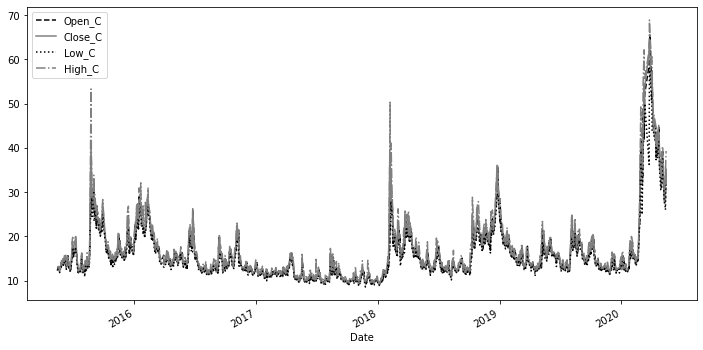

In [37]:
no_outlier_prices['Open_C'].plot(figsize=(12,6), linestyle='--', color='black', legend='Open_C')
no_outlier_prices['Close_C'].plot(figsize=(12,6), linestyle='-', color='grey', legend='Close_C')
no_outlier_prices['Low_C'].plot(figsize=(12,6), linestyle=':', color='black', legend='Low_C')
no_outlier_prices['High_C'].plot(figsize=(12,6), linestyle='-.', color='grey', legend='High_C')

In [38]:
pd.set_option('display.max_rows', None)
no_outlier_prices[['Open_C', 'Close_C', 'Low_C', 'High_C']].describe()

,Open_C,Close_C,Low_C,High_C
count,1095.000000,1095.000000,1095.000000,1095.000000
mean,16.147571,16.072648,15.223635,17.214539
std,6.764147,6.773569,5.995822,7.588690
min,9.010000,9.140000,8.560000,9.310000
25%,12.420000,12.285000,11.865000,12.890000
50%,14.160000,14.060000,13.440000,14.940000
75%,17.625000,17.500000,16.550000,18.929999
max,65.669998,63.950001,58.029999,68.860001


In [44]:
pd.set_option('display.max_rows', 5)

In [50]:
close_prices = no_outlier_prices[['Close_A', 'Close_B', 'Close_C']]
close_prices

,Close_A,Close_B,Close_C
Date,,,
2015-05-15,18272.560547,2122.729980,12.380000
2015-05-18,18298.880859,2129.199951,12.730000
...,...,...,...
2020-05-13,23247.970703,2820.000000,35.279999
2020-05-14,23625.339844,2852.500000,32.610001


In [55]:
# shift period forward, subtract close price difference and rename column
delta_close_prices = (close_prices.shift(periods= -1) - close_prices).fillna(0)
delta_close_prices.columns = ['Delta_Close_A', 'Delta_Close_B', 'Delta_Close_C']
delta_close_prices

,Delta_Close_A,Delta_Close_B,Delta_Close_C
Date,,,
2015-05-15,26.320312,6.469971,0.350000
2015-05-18,13.509766,-1.369873,0.120000
2015-05-19,-26.650391,2.989990,-0.740000
2015-05-21,-53.720703,-4.760009,0.020000
2015-05-22,-190.480468,-21.860108,1.930000
2015-05-26,121.451171,19.280029,-0.790000
2015-05-27,-36.871093,-2.689941,0.040000
2015-05-28,-115.439453,-13.400146,0.530000
2015-05-29,29.689453,4.340087,0.130000


In [56]:
pd.set_option("display.max_rows", None)
delta_close_prices.describe()

,Delta_Close_A,Delta_Close_B,Delta_Close_C
count,1095.000000,1095.000000,1095.000000
mean,4.888383,0.666457,0.018475
std,268.137091,29.218995,1.938761
min,-2848.310547,-294.049805,-9.120001
25%,-70.894532,-7.140076,-0.760000
50%,15.539063,1.770020,-0.080000
75%,113.290039,12.255005,0.540001
max,1351.619141,154.510009,20.010001


<AxesSubplot:ylabel='Frequency'>

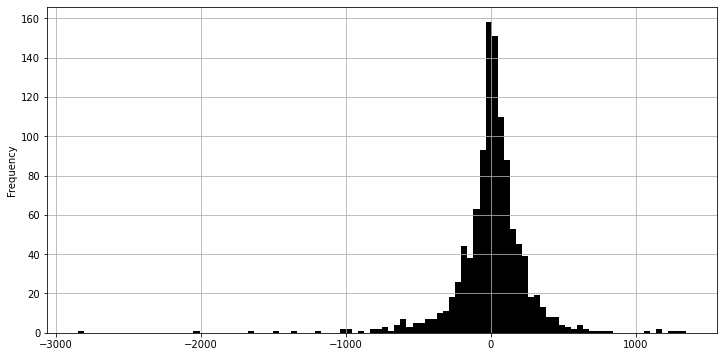

In [57]:
delta_close_prices['Delta_Close_A'].plot(kind='hist', bins=100, figsize=(12,6), color='black', grid=True)


<AxesSubplot:>

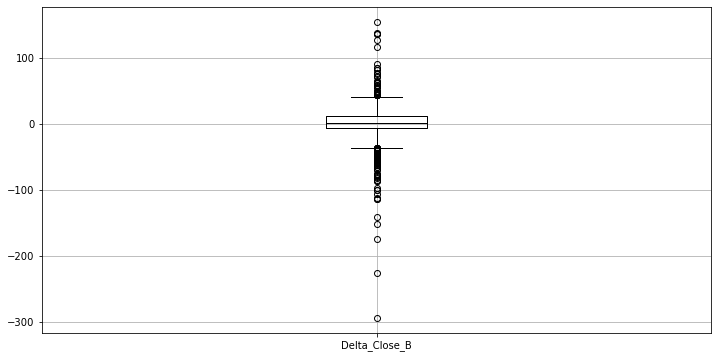

In [58]:
delta_close_prices['Delta_Close_B'].plot(kind='box', figsize=(12,6), color='black', grid=True)


array([[<AxesSubplot:xlabel='Delta_Close_A', ylabel='Delta_Close_A'>,
        <AxesSubplot:xlabel='Delta_Close_B', ylabel='Delta_Close_A'>,
        <AxesSubplot:xlabel='Delta_Close_C', ylabel='Delta_Close_A'>],
       [<AxesSubplot:xlabel='Delta_Close_A', ylabel='Delta_Close_B'>,
        <AxesSubplot:xlabel='Delta_Close_B', ylabel='Delta_Close_B'>,
        <AxesSubplot:xlabel='Delta_Close_C', ylabel='Delta_Close_B'>],
       [<AxesSubplot:xlabel='Delta_Close_A', ylabel='Delta_Close_C'>,
        <AxesSubplot:xlabel='Delta_Close_B', ylabel='Delta_Close_C'>,
        <AxesSubplot:xlabel='Delta_Close_C', ylabel='Delta_Close_C'>]],
      dtype=object)

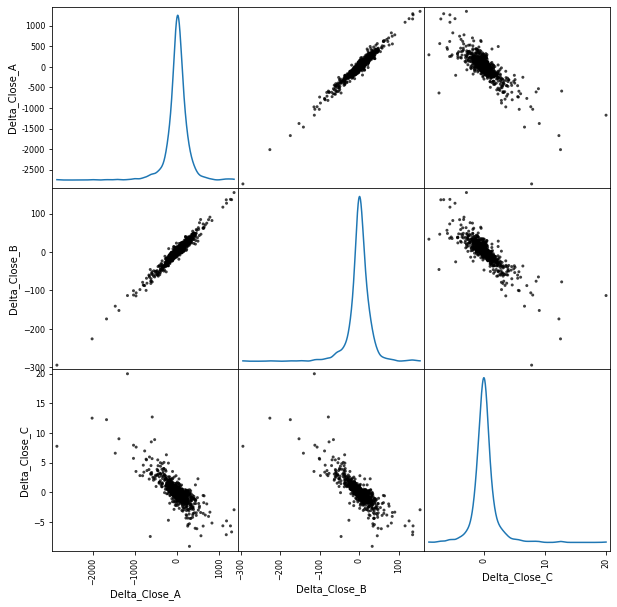

In [59]:
pd.plotting.scatter_matrix(delta_close_prices, figsize=(10,10), color='black', alpha=0.75, diagonal='kde', grid=True)


In [60]:
delta_close_prices.corr()

,Delta_Close_A,Delta_Close_B,Delta_Close_C
Delta_Close_A,1.000000,0.976104,-0.785566
Delta_Close_B,0.976104,1.000000,-0.817788
Delta_Close_C,-0.785566,-0.817788,1.000000


<AxesSubplot:>

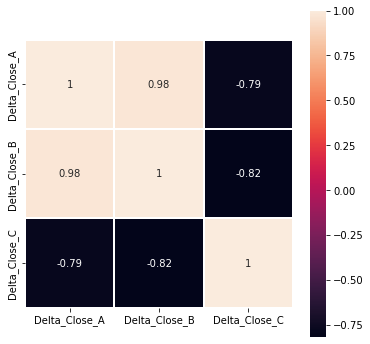

In [61]:
# alt correlation visual as heatmap
plt.figure(figsize=(6,6))
sn.heatmap(delta_close_prices.corr(), annot=True, square=True, linewidths=2)

In [67]:
dtale.show(valid_close_df)